# Data Analysis

In [30]:
import pandas as pd 
import matplotlib as plt
import pandas_profiling as pp
import seaborn as sns
from datetime import datetime as dt
sns.set() 

In [159]:
df = pd.read_csv('sensor_data.csv')

In [95]:
df 

serialNumber        iaq      timestamp      eVOC  bearing  pressure  \
0     fKuASomCxPUz  238.82520  1601676015176  5.668798     -159     94129   
1     fKuASomCxPUz   25.00000  1601468131186  0.500000      171     96762   
2     fKuASomCxPUz   25.66664  1602404424738  0.507928      152     97294   
3     m3wjc22wyh88   54.74592  1599305715168  0.757911      103     97083   
4     m3wjc22wyh88  105.09960  1600445101549  1.393267      112     97273   
...            ...        ...            ...       ...      ...       ...   
1267  fKuASomCxPUz   25.00000  1600576518373  0.500000      152     96709   
1268  m3wjc22wyh88  113.79820  1599976217116  1.222781      108     97784   
1269  wthsftyK5vgu  206.18010  1601796315720  2.218808      -54     95306   
1270  m3wjc22wyh88   93.30641  1598736915134  0.784979      100     95970   
1271  fKuASomCxPUz   25.00000  1602056122945  0.500000     -173     96805   

      humidity  altitude  batteryPercent       eCO2              deviceId  \
0     55.13599  617.1189              85  1856.2810  I1t2t86ZQoGIAv1i30r9   
1     43.78288  387.0218             100   500.0000  I1t2t86ZQoGIAv1i30r9   
2     54.54848  341.1472              48   504.1630  I1t2t86ZQoGIAv1i30r9   
3     45.53238  359.3173              97   610.0677  fFrU8brLxN5Wea7PQwJg   
4     38.55331  342.9540              97   927.9365  fFrU8brLxN5Wea7PQwJg   
...        ...       ...             ...        ...                   ...   
1267  62.99857  391.6028              78   500.0000  I1t2t86ZQoGIAv1i30r9   
1268  61.69254  299.0734              97   841.5912  fFrU8brLxN5Wea7PQwJg   
1269  56.89602  513.6255              65  1235.7600  UefkqbOojs07AR21i0ix   
1270  58.39550  455.6953              97   619.3532  fFrU8brLxN5Wea7PQwJg   
1271  56.57349  383.3062              77   500.0000  I1t2t86ZQoGIAv1i30r9   

      luminance  iaqAccuracy  temperature                        userId  
0             0            3     22.11985  ztx11HwFoJPuDJd1p7lLilvvkjg2  
1           699            0     26.01985  ztx11HwFoJPuDJd1p7lLilvvkjg2  
2           186            2     23.01985  ztx11HwFoJPuDJd1p7lLilvvkjg2  
3          1730            3     26.06485  ztx11HwFoJPuDJd1p7lLilvvkjg2  
4          2512            3     31.05985  ztx11HwFoJPuDJd1p7lLilvvkjg2  
...         ...          ...          ...                           ...  
1267          0            2     21.78985  ztx11HwFoJPuDJd1p7lLilvvkjg2  
1268        334            3     20.88485  ztx11HwFoJPuDJd1p7lLilvvkjg2  
1269        332            1     19.13985  ztx11HwFoJPuDJd1p7lLilvvkjg2  
1270          0            1     24.54485  ztx11HwFoJPuDJd1p7lLilvvkjg2  
1271        103            2     22.71985  ztx11HwFoJPuDJd1p7lLilvvkjg2  

[1272 rows x 15 columns]

<AxesSubplot:>

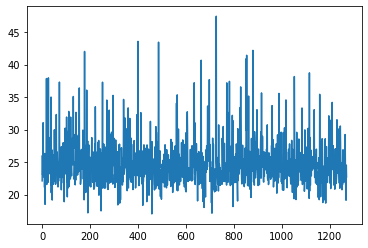

In [7]:
df.temperature.plot()

In [160]:
df['time'] = pd.to_datetime(df['timestamp'], unit='ms')

In [161]:
df.isna().sum()

serialNumber      55
iaq                0
timestamp          0
eVOC               0
bearing            0
pressure           0
humidity           0
altitude           0
batteryPercent     0
eCO2               0
deviceId           5
luminance          0
iaqAccuracy        0
temperature        0
userId             5
time               0
dtype: int64

In [31]:
pp.ProfileReport(df)

-----

#### filling the missing values: we only care about the deviceID, not the userId nor the serial number. 

In [162]:
df[df['deviceId'].isna()].altitude.mean()

368.37145999999996

In [163]:
df.deviceId.unique()

array(['I1t2t86ZQoGIAv1i30r9', 'fFrU8brLxN5Wea7PQwJg',
       'UefkqbOojs07AR21i0ix', 'SAGvj9Ar25aG4i3Xxta1',
       'So15xXTTj0GAoVeomUCA', 'gbeSfksDVEIUEEz60y87', nan], dtype=object)

In [164]:
df.groupby('deviceId')['altitude'].mean()

deviceId
I1t2t86ZQoGIAv1i30r9    425.841930
SAGvj9Ar25aG4i3Xxta1    400.820003
So15xXTTj0GAoVeomUCA    365.792739
UefkqbOojs07AR21i0ix    429.038366
fFrU8brLxN5Wea7PQwJg    365.926171
gbeSfksDVEIUEEz60y87    344.366947
Name: altitude, dtype: float64

In [165]:
df.groupby(['deviceId', 'userId'])['altitude'].mean()

deviceId              userId                      
I1t2t86ZQoGIAv1i30r9  ztx11HwFoJPuDJd1p7lLilvvkjg2    425.841930
SAGvj9Ar25aG4i3Xxta1  ztx11HwFoJPuDJd1p7lLilvvkjg2    400.820003
So15xXTTj0GAoVeomUCA  ztx11HwFoJPuDJd1p7lLilvvkjg2    365.792739
UefkqbOojs07AR21i0ix  ztx11HwFoJPuDJd1p7lLilvvkjg2    429.038366
fFrU8brLxN5Wea7PQwJg  ztx11HwFoJPuDJd1p7lLilvvkjg2    365.926171
gbeSfksDVEIUEEz60y87  U6rvFKB7l8gOFQca1lMf8zP0i8X2    344.366947
Name: altitude, dtype: float64

there are only two user IDs, and we can see that the mean altitude from the Nan of the device Id is very close to two deviceIDs. But these two device Ids have the same userId. So I think tose devices are in the same house. Theresfore, we oly care about the deviceID for knowing the general location. SO we will replace the Nan with the deviceId: fFrU8brLxN5Wea7PQwJg 

In [166]:
df.deviceId.fillna('fFrU8brLxN5Wea7PQwJg', inplace=True)

------ 

In [167]:
df.sort_values(by ='timestamp')

serialNumber        iaq      timestamp       eVOC     bearing  pressure  \
1264           NaN   25.00000  1598266510410   0.500000         180     97025   
952            NaN   25.00000  1598270107009   0.500000         -26     97015   
121            NaN   25.00000  1598271902186   0.500000        -135     96990   
1127           NaN   25.00000  1598273408375   0.500000        -135     96974   
31             NaN   25.00000  1598274308303   0.500000 -1515870811     96937   
...            ...        ...            ...        ...         ...       ...   
497   m3wjc22wyh88  173.94340  1603434617714   4.505736         117     96834   
1090  fKuASomCxPUz   25.00000  1603641617268   0.500000         153     95990   
953   fKuASomCxPUz   31.21753  1603650625081   0.520955         158     96041   
760   fKuASomCxPUz  125.23490  1603661420659   1.361588         159     95819   
488   fKuASomCxPUz  182.67190  1603684825515  13.316640         158     95658   

      humidity  altitude  batteryPercent       eCO2              deviceId  \
1264  38.03350  364.3173               0   500.0000  SAGvj9Ar25aG4i3Xxta1   
952   36.14250  365.1798               0   500.0000  SAGvj9Ar25aG4i3Xxta1   
121   34.53550  367.3358               0   500.0000  SAGvj9Ar25aG4i3Xxta1   
1127  34.73250  368.7163               0   500.0000  SAGvj9Ar25aG4i3Xxta1   
31    29.42500  371.9086               0   500.0000  SAGvj9Ar25aG4i3Xxta1   
...        ...       ...             ...        ...                   ...   
497   61.68655  380.8005              98  1704.3760  fFrU8brLxN5Wea7PQwJg   
1090  38.97186  453.9557              49   500.0000  I1t2t86ZQoGIAv1i30r9   
953   41.09187  449.5208              69   510.8640  I1t2t86ZQoGIAv1i30r9   
760   45.79691  468.8408              97   912.7219  I1t2t86ZQoGIAv1i30r9   
488   57.17901  482.8750             100  2421.2540  I1t2t86ZQoGIAv1i30r9   

      luminance  iaqAccuracy  temperature                        userId  \
1264        996            0     23.85000  ztx11HwFoJPuDJd1p7lLilvvkjg2   
952        1337            0     24.28500  ztx11HwFoJPuDJd1p7lLilvvkjg2   
121        1206            0     24.91000  ztx11HwFoJPuDJd1p7lLilvvkjg2   
1127       1101            0     24.90500  ztx11HwFoJPuDJd1p7lLilvvkjg2   
31          717            0     26.24000  ztx11HwFoJPuDJd1p7lLilvvkjg2   
...         ...          ...          ...                           ...   
497         111            3     22.15985  ztx11HwFoJPuDJd1p7lLilvvkjg2   
1090         97            1     26.10985  ztx11HwFoJPuDJd1p7lLilvvkjg2   
953          41            1     25.81985  ztx11HwFoJPuDJd1p7lLilvvkjg2   
760          43            3     24.11485  ztx11HwFoJPuDJd1p7lLilvvkjg2   
488           1            3     20.86985  ztx11HwFoJPuDJd1p7lLilvvkjg2   

                        time  
1264 2020-08-24 10:55:10.410  
952  2020-08-24 11:55:07.009  
121  2020-08-24 12:25:02.186  
1127 2020-08-24 12:50:08.375  
31   2020-08-24 13:05:08.303  
...                      ...  
497  2020-10-23 06:30:17.714  
1090 2020-10-25 16:00:17.268  
953  2020-10-25 18:30:25.081  
760  2020-10-25 21:30:20.659  
488  2020-10-26 04:00:25.515  

[1272 rows x 16 columns]

#### getting the device location : no need, all the devices are in Zurich

------

----


In [75]:
df.sort_values(by = 'timestamp')

serialNumber        iaq               timestamp       eVOC     bearing  \
1264           NaN   25.00000 2020-08-24 10:55:10.410   0.500000         180   
952            NaN   25.00000 2020-08-24 11:55:07.009   0.500000         -26   
121            NaN   25.00000 2020-08-24 12:25:02.186   0.500000        -135   
1127           NaN   25.00000 2020-08-24 12:50:08.375   0.500000        -135   
31             NaN   25.00000 2020-08-24 13:05:08.303   0.500000 -1515870811   
...            ...        ...                     ...        ...         ...   
497   m3wjc22wyh88  173.94340 2020-10-23 06:30:17.714   4.505736         117   
1090  fKuASomCxPUz   25.00000 2020-10-25 16:00:17.268   0.500000         153   
953   fKuASomCxPUz   31.21753 2020-10-25 18:30:25.081   0.520955         158   
760   fKuASomCxPUz  125.23490 2020-10-25 21:30:20.659   1.361588         159   
488   fKuASomCxPUz  182.67190 2020-10-26 04:00:25.515  13.316640         158   

      pressure  humidity  altitude  batteryPercent       eCO2  \
1264     97025  38.03350  364.3173               0   500.0000   
952      97015  36.14250  365.1798               0   500.0000   
121      96990  34.53550  367.3358               0   500.0000   
1127     96974  34.73250  368.7163               0   500.0000   
31       96937  29.42500  371.9086               0   500.0000   
...        ...       ...       ...             ...        ...   
497      96834  61.68655  380.8005              98  1704.3760   
1090     95990  38.97186  453.9557              49   500.0000   
953      96041  41.09187  449.5208              69   510.8640   
760      95819  45.79691  468.8408              97   912.7219   
488      95658  57.17901  482.8750             100  2421.2540   

                  deviceId  luminance  iaqAccuracy  temperature  \
1264  SAGvj9Ar25aG4i3Xxta1        996            0     23.85000   
952   SAGvj9Ar25aG4i3Xxta1       1337            0     24.28500   
121   SAGvj9Ar25aG4i3Xxta1       1206            0     24.91000   
1127  SAGvj9Ar25aG4i3Xxta1       1101            0     24.90500   
31    SAGvj9Ar25aG4i3Xxta1        717            0     26.24000   
...                    ...        ...          ...          ...   
497   fFrU8brLxN5Wea7PQwJg        111            3     22.15985   
1090  I1t2t86ZQoGIAv1i30r9         97            1     26.10985   
953   I1t2t86ZQoGIAv1i30r9         41            1     25.81985   
760   I1t2t86ZQoGIAv1i30r9         43            3     24.11485   
488   I1t2t86ZQoGIAv1i30r9          1            3     20.86985   

                            userId location  
1264  ztx11HwFoJPuDJd1p7lLilvvkjg2   Zurich  
952   ztx11HwFoJPuDJd1p7lLilvvkjg2   Zurich  
121   ztx11HwFoJPuDJd1p7lLilvvkjg2   Zurich  
1127  ztx11HwFoJPuDJd1p7lLilvvkjg2   Zurich  
31    ztx11HwFoJPuDJd1p7lLilvvkjg2   Zurich  
...                            ...      ...  
497   ztx11HwFoJPuDJd1p7lLilvvkjg2   Zurich  
1090  ztx11HwFoJPuDJd1p7lLilvvkjg2   Zurich  
953   ztx11HwFoJPuDJd1p7lLilvvkjg2   Zurich  
760   ztx11HwFoJPuDJd1p7lLilvvkjg2   Zurich  
488   ztx11HwFoJPuDJd1p7lLilvvkjg2   Zurich  

[1272 rows x 16 columns]

deviceId
I1t2t86ZQoGIAv1i30r9    AxesSubplot(0.125,0.2;0.775x0.68)
SAGvj9Ar25aG4i3Xxta1    AxesSubplot(0.125,0.2;0.775x0.68)
So15xXTTj0GAoVeomUCA    AxesSubplot(0.125,0.2;0.775x0.68)
UefkqbOojs07AR21i0ix    AxesSubplot(0.125,0.2;0.775x0.68)
fFrU8brLxN5Wea7PQwJg    AxesSubplot(0.125,0.2;0.775x0.68)
gbeSfksDVEIUEEz60y87    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

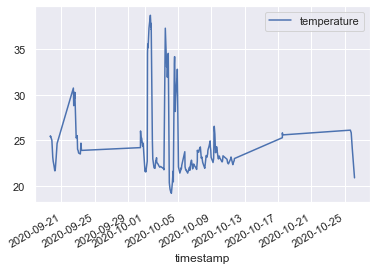

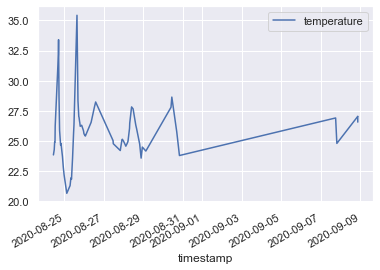

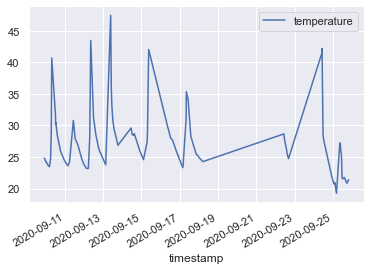

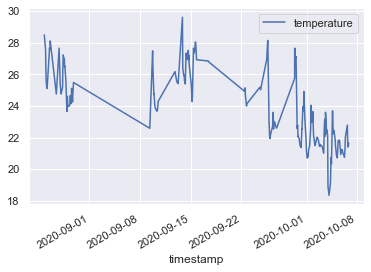

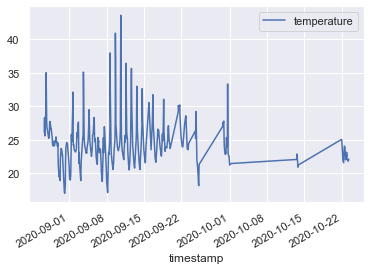

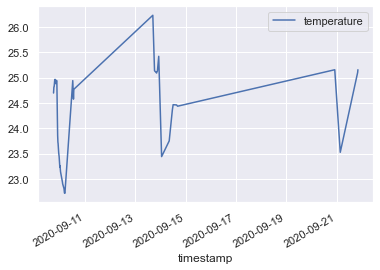

In [85]:
df.groupby('deviceId').plot.line(x='timestamp', y='temperature')

# Historical Weather Data

In [300]:
hist_data = pd.read_csv('e58aa41f4af139436706552a1c79422e.csv')

In [301]:
hist_data

dt                         dt_iso  timezone city_name  \
0      1483228800  2017-01-01 00:00:00 +0000 UTC      3600    Zurich   
1      1483232400  2017-01-01 01:00:00 +0000 UTC      3600    Zurich   
2      1483236000  2017-01-01 02:00:00 +0000 UTC      3600    Zurich   
3      1483239600  2017-01-01 03:00:00 +0000 UTC      3600    Zurich   
4      1483243200  2017-01-01 04:00:00 +0000 UTC      3600    Zurich   
...           ...                            ...       ...       ...   
33701  1603738800  2020-10-26 19:00:00 +0000 UTC      3600    Zurich   
33702  1603742400  2020-10-26 20:00:00 +0000 UTC      3600    Zurich   
33703  1603746000  2020-10-26 21:00:00 +0000 UTC      3600    Zurich   
33704  1603749600  2020-10-26 22:00:00 +0000 UTC      3600    Zurich   
33705  1603753200  2020-10-26 23:00:00 +0000 UTC      3600    Zurich   

             lat       lon  temp  feels_like  temp_min  temp_max  ...  \
0      47.376887  8.541694 -3.27       -6.08     -5.02     -1.89  ...   
1      47.376887  8.541694 -3.37       -6.55     -5.40     -0.40  ...   
2      47.376887  8.541694 -3.46       -6.98     -5.59     -0.40  ...   
3      47.376887  8.541694 -3.69       -7.25     -5.90     -1.93  ...   
4      47.376887  8.541694 -3.65       -6.84     -6.70      0.50  ...   
...          ...       ...   ...         ...       ...       ...  ...   
33701  47.376887  8.541694  4.56        0.79      1.63      6.11  ...   
33702  47.376887  8.541694  4.62        0.51      2.09      6.00  ...   
33703  47.376887  8.541694  4.76        1.72      2.09      6.11  ...   
33704  47.376887  8.541694  4.74        2.67      2.09      6.11  ...   
33705  47.376887  8.541694  4.89        1.87      2.46      6.11  ...   

       wind_deg  rain_1h  rain_3h  snow_1h  snow_3h  clouds_all  weather_id  \
0           250      NaN      NaN      NaN      NaN          21         801   
1           200      NaN      NaN      NaN      NaN          26         802   
2           180      NaN      NaN      NaN      NaN          16         801   
3           220      NaN      NaN      NaN      NaN          20         801   
4           250      NaN      NaN      NaN      NaN          14         801   
...         ...      ...      ...      ...      ...         ...         ...   
33701       130      NaN      NaN      NaN      NaN          40         802   
33702       150      NaN      NaN      NaN      NaN          40         802   
33703       160      NaN      NaN      NaN      NaN         100         804   
33704         0      NaN      NaN      NaN      NaN          90         804   
33705       120      NaN      NaN      NaN      NaN          75         803   

       weather_main  weather_description  weather_icon  
0            Clouds           few clouds           02n  
1            Clouds     scattered clouds           03n  
2            Clouds           few clouds           02n  
3            Clouds           few clouds           02n  
4            Clouds           few clouds           02n  
...             ...                  ...           ...  
33701        Clouds     scattered clouds           03n  
33702        Clouds     scattered clouds           03n  
33703        Clouds      overcast clouds           04n  
33704        Clouds      overcast clouds           04n  
33705        Clouds        broken clouds           04n  

[33706 rows x 25 columns]

In [302]:
hist_data['time'] = pd.to_datetime(hist_data['dt'], unit='s')

In [267]:
hist_data

dt                         dt_iso  timezone city_name  \
0      1483228800  2017-01-01 00:00:00 +0000 UTC      3600    Zurich   
1      1483232400  2017-01-01 01:00:00 +0000 UTC      3600    Zurich   
2      1483236000  2017-01-01 02:00:00 +0000 UTC      3600    Zurich   
3      1483239600  2017-01-01 03:00:00 +0000 UTC      3600    Zurich   
4      1483243200  2017-01-01 04:00:00 +0000 UTC      3600    Zurich   
...           ...                            ...       ...       ...   
33701  1603738800  2020-10-26 19:00:00 +0000 UTC      3600    Zurich   
33702  1603742400  2020-10-26 20:00:00 +0000 UTC      3600    Zurich   
33703  1603746000  2020-10-26 21:00:00 +0000 UTC      3600    Zurich   
33704  1603749600  2020-10-26 22:00:00 +0000 UTC      3600    Zurich   
33705  1603753200  2020-10-26 23:00:00 +0000 UTC      3600    Zurich   

             lat       lon  temp  feels_like  temp_min  temp_max  ...  \
0      47.376887  8.541694 -3.27       -6.08     -5.02     -1.89  ...   
1      47.376887  8.541694 -3.37       -6.55     -5.40     -0.40  ...   
2      47.376887  8.541694 -3.46       -6.98     -5.59     -0.40  ...   
3      47.376887  8.541694 -3.69       -7.25     -5.90     -1.93  ...   
4      47.376887  8.541694 -3.65       -6.84     -6.70      0.50  ...   
...          ...       ...   ...         ...       ...       ...  ...   
33701  47.376887  8.541694  4.56        0.79      1.63      6.11  ...   
33702  47.376887  8.541694  4.62        0.51      2.09      6.00  ...   
33703  47.376887  8.541694  4.76        1.72      2.09      6.11  ...   
33704  47.376887  8.541694  4.74        2.67      2.09      6.11  ...   
33705  47.376887  8.541694  4.89        1.87      2.46      6.11  ...   

       rain_1h  rain_3h  snow_1h  snow_3h  clouds_all  weather_id  \
0          NaN      NaN      NaN      NaN          21         801   
1          NaN      NaN      NaN      NaN          26         802   
2          NaN      NaN      NaN      NaN          16         801   
3          NaN      NaN      NaN      NaN          20         801   
4          NaN      NaN      NaN      NaN          14         801   
...        ...      ...      ...      ...         ...         ...   
33701      NaN      NaN      NaN      NaN          40         802   
33702      NaN      NaN      NaN      NaN          40         802   
33703      NaN      NaN      NaN      NaN         100         804   
33704      NaN      NaN      NaN      NaN          90         804   
33705      NaN      NaN      NaN      NaN          75         803   

       weather_main  weather_description  weather_icon                time  
0            Clouds           few clouds           02n 2017-01-01 00:00:00  
1            Clouds     scattered clouds           03n 2017-01-01 01:00:00  
2            Clouds           few clouds           02n 2017-01-01 02:00:00  
3            Clouds           few clouds           02n 2017-01-01 03:00:00  
4            Clouds           few clouds           02n 2017-01-01 04:00:00  
...             ...                  ...           ...                 ...  
33701        Clouds     scattered clouds           03n 2020-10-26 19:00:00  
33702        Clouds     scattered clouds           03n 2020-10-26 20:00:00  
33703        Clouds      overcast clouds           04n 2020-10-26 21:00:00  
33704        Clouds      overcast clouds           04n 2020-10-26 22:00:00  
33705        Clouds        broken clouds           04n 2020-10-26 23:00:00  

[33706 rows x 26 columns]

# Matching the time stamps between historical weather data and sensor data

In [207]:
hist_data.time 

0       2017-01-01 00:00:00
1       2017-01-01 01:00:00
2       2017-01-01 02:00:00
3       2017-01-01 03:00:00
4       2017-01-01 04:00:00
                ...        
33701   2020-10-26 19:00:00
33702   2020-10-26 20:00:00
33703   2020-10-26 21:00:00
33704   2020-10-26 22:00:00
33705   2020-10-26 23:00:00
Name: time, Length: 33706, dtype: datetime64[ns]

In [219]:
df['time'] = pd.to_datetime(df['time'])

In [220]:
df['time'] = df['time'].apply(lambda t: t.replace(second=0))

In [221]:
df['time'] = df['time'].apply(lambda t: t.strftime('%Y-%m-%d %H:%M:%S'))

In [222]:
df.time 

0       2020-10-02 22:00:00
1       2020-09-30 12:15:00
2       2020-10-11 08:20:00
3       2020-09-05 11:35:00
4       2020-09-18 16:05:00
               ...         
1267    2020-09-20 04:35:00
1268    2020-09-13 05:50:00
1269    2020-10-04 07:25:00
1270    2020-08-29 21:35:00
1271    2020-10-07 07:35:00
Name: time, Length: 1272, dtype: object

## option 1: in my sensor data, replace the minutes by 00 so that they match the exct time from the sweather dabsata

In [223]:
df_minutes = df.copy()

In [224]:
df_minutes['time'] = pd.to_datetime(df_minutes['time'])

In [225]:
df_minutes['time'] = df_minutes['time'].apply(lambda t: t.replace(minute=0))

In [226]:
df_minutes = df_minutes.merge(hist_data, left_on='time', right_on='time')

In [186]:
df_minutes.columns 

Index(['serialNumber', 'iaq', 'timestamp', 'eVOC', 'bearing', 'pressure_x',
       'humidity_x', 'altitude', 'batteryPercent', 'eCO2', 'deviceId',
       'luminance', 'iaqAccuracy', 'temperature', 'userId', 'time', 'dt',
       'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure_y', 'sea_level', 'grnd_level',
       'humidity_y', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h',
       'snow_3h', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description', 'weather_icon'],
      dtype='object')

In [228]:
df_minutes.isna().sum()

serialNumber             55
iaq                       0
timestamp                 0
eVOC                      0
bearing                   0
pressure_x                0
humidity_x                0
altitude                  0
batteryPercent            0
eCO2                      0
deviceId                  0
luminance                 0
iaqAccuracy               0
temperature               0
userId                    5
time                      0
dt                        0
dt_iso                    0
timezone                  0
city_name                 0
lat                       0
lon                       0
temp                      0
feels_like                0
temp_min                  0
temp_max                  0
pressure_y                0
sea_level              1282
grnd_level             1282
humidity_y                0
wind_speed                0
wind_deg                  0
rain_1h                1047
rain_3h                1282
snow_1h                1282
snow_3h             

### Preparing the df for the machine learning

In [177]:
hist_data.columns 

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level',
       'grnd_level', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'weather_icon', 'time'],
      dtype='object')

In [178]:
df_minutes.columns 

Index(['serialNumber', 'iaq', 'timestamp', 'eVOC', 'bearing', 'pressure_x',
       'humidity_x', 'altitude', 'batteryPercent', 'eCO2', 'deviceId',
       'luminance', 'iaqAccuracy', 'temperature', 'userId', 'time', 'dt',
       'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure_y', 'sea_level', 'grnd_level',
       'humidity_y', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h',
       'snow_3h', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description', 'weather_icon'],
      dtype='object')

In [229]:
# keep the columns that I want to have as features 
X = df_minutes[['temp', 'feels_like', 'pressure_y', 'humidity_y', 'wind_speed', 'wind_deg', 'clouds_all']]

In [230]:
X

temp  feels_like  pressure_y  humidity_y  wind_speed  wind_deg  \
0     12.24       10.15         977          87         3.1       320   
1     14.87       14.40        1015          76         1.0         0   
2     14.87       14.40        1015          76         1.0         0   
3     14.87       14.40        1015          76         1.0         0   
4     14.87       14.40        1015          76         1.0         0   
...     ...         ...         ...         ...         ...       ...   
1277  17.11       16.55        1015          59         0.5         0   
1278  17.81       18.60        1024          87         1.5         0   
1279  19.30       17.44        1010          49         2.1       290   
1280  26.24       24.64        1025          47         4.1        40   
1281  14.03       14.95        1007         100         0.5        72   

      clouds_all  
0             75  
1             40  
2             40  
3             40  
4             40  
...          ...  
1277          40  
1278          13  
1279          40  
1280           0  
1281          75  

[1282 rows x 7 columns]

In [231]:
X.isna().sum()

temp          0
feels_like    0
pressure_y    0
humidity_y    0
wind_speed    0
wind_deg      0
clouds_all    0
dtype: int64

In [232]:
Y_temp = df_minutes['temperature']

In [233]:
Y_hum = df_minutes['humidity_x']

In [234]:
Y_light = df_minutes['luminance']

In [235]:
Y_air = df_minutes['iaqAccuracy']

In [236]:
Y_co2 = df_minutes['eCO2']

## option 2: if the sensor data is not measured at the exact hour, then create function to modify the input from the weather data so it matches the time in the sensor data

- in the sensor data, collect only pertinent info for clarity: 'temperature', 'humidity_x', 'luminance', 'iaqAccuracy', 'eCO2', 'time'
- make sure the timestamp of both df are indexes
- concat on indexes
- input new data by linear interpolation 

In [325]:
df_av = df.copy()

In [326]:
df_av['time'] = pd.to_datetime(df_av['time'])

In [327]:
#in the sensor data, collect only pertinent info for clarity
df_av = df_av[['temperature', 'humidity', 'luminance', 'iaqAccuracy', 'eCO2', 'time']]

In [363]:
df_av.time

0      2020-10-02 22:00:00
1      2020-09-30 12:15:00
2      2020-10-11 08:20:00
3      2020-09-05 11:35:00
4      2020-09-18 16:05:00
               ...        
1267   2020-09-20 04:35:00
1268   2020-09-13 05:50:00
1269   2020-10-04 07:25:00
1270   2020-08-29 21:35:00
1271   2020-10-07 07:35:00
Name: time, Length: 1272, dtype: datetime64[ns]

In [364]:
hist_data

temp_hist  feels_like  pressure  humidity_hist  wind_speed  wind_deg  \
0          -3.27       -6.08      1031             97         0.5       250   
1          -3.37       -6.55      1031             97         1.0       200   
2          -3.46       -6.98      1030             98         1.5       180   
3          -3.69       -7.25      1029             97         1.5       220   
4          -3.65       -6.84      1029             98         1.0       250   
...          ...         ...       ...            ...         ...       ...   
33701       4.56        0.79      1010             86         3.1       130   
33702       4.62        0.51      1010             86         3.6       150   
33703       4.76        1.72      1010             86         2.1       160   
33704       4.74        2.67      1010             93         1.0         0   
33705       4.89        1.87      1010             86         2.1       120   

       clouds_all                time  
0              21 2017-01-01 00:00:00  
1              26 2017-01-01 01:00:00  
2              16 2017-01-01 02:00:00  
3              20 2017-01-01 03:00:00  
4              14 2017-01-01 04:00:00  
...           ...                 ...  
33701          40 2020-10-26 19:00:00  
33702          40 2020-10-26 20:00:00  
33703         100 2020-10-26 21:00:00  
33704          90 2020-10-26 22:00:00  
33705          75 2020-10-26 23:00:00  

[33706 rows x 8 columns]

In [328]:
#in the historical data , collect only the pertinent info 
hist_data = hist_data[['temp', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'clouds_all', 'time']]

KeyError: "['humidity', 'temp'] not in index"

In [310]:
#rename the hist_data column temperature and humidity fto avoid confusion:
hist_data = hist_data.rename(columns={"temp": "temp_hist", "humidity": "humidity_hist"})

In [336]:
# concat both df on indexes
data = df_av.set_index('time').join(hist_data.set_index('time'), how='outer')

In [337]:
#select only the relevant time in the data data :  from 26.08.2020 to 26.10.2020
data = data.loc['2020-08-24':'2020-10-26']

In [338]:
data

temperature  humidity  luminance  iaqAccuracy  eCO2  \
time                                                                       
2020-08-24 00:00:00          NaN       NaN        NaN          NaN   NaN   
2020-08-24 01:00:00          NaN       NaN        NaN          NaN   NaN   
2020-08-24 02:00:00          NaN       NaN        NaN          NaN   NaN   
2020-08-24 03:00:00          NaN       NaN        NaN          NaN   NaN   
2020-08-24 04:00:00          NaN       NaN        NaN          NaN   NaN   
...                          ...       ...        ...          ...   ...   
2020-10-26 19:00:00          NaN       NaN        NaN          NaN   NaN   
2020-10-26 20:00:00          NaN       NaN        NaN          NaN   NaN   
2020-10-26 21:00:00          NaN       NaN        NaN          NaN   NaN   
2020-10-26 22:00:00          NaN       NaN        NaN          NaN   NaN   
2020-10-26 23:00:00          NaN       NaN        NaN          NaN   NaN   

                     temp_hist  feels_like  pressure  humidity_hist  \
time                                                                  
2020-08-24 00:00:00      15.30       13.95    1019.0           72.0   
2020-08-24 01:00:00      15.24       14.96    1012.0           72.0   
2020-08-24 02:00:00      14.65       14.18    1011.0           77.0   
2020-08-24 03:00:00      14.08       14.02    1009.0           82.0   
2020-08-24 04:00:00      13.54       13.33    1018.0           82.0   
...                        ...         ...       ...            ...   
2020-10-26 19:00:00       4.56        0.79    1010.0           86.0   
2020-10-26 20:00:00       4.62        0.51    1010.0           86.0   
2020-10-26 21:00:00       4.76        1.72    1010.0           86.0   
2020-10-26 22:00:00       4.74        2.67    1010.0           93.0   
2020-10-26 23:00:00       4.89        1.87    1010.0           86.0   

                     wind_speed  wind_deg  clouds_all  
time                                                   
2020-08-24 00:00:00        2.10     120.0        90.0  
2020-08-24 01:00:00        0.55     334.0        75.0  
2020-08-24 02:00:00        1.00      90.0        75.0  
2020-08-24 03:00:00        0.57      11.0        75.0  
2020-08-24 04:00:00        0.57      11.0        20.0  
...                         ...       ...         ...  
2020-10-26 19:00:00        3.10     130.0        40.0  
2020-10-26 20:00:00        3.60     150.0        40.0  
2020-10-26 21:00:00        2.10     160.0       100.0  
2020-10-26 22:00:00        1.00       0.0        90.0  
2020-10-26 23:00:00        2.10     120.0        75.0  

[2748 rows x 12 columns]

In [339]:
data.index.is_unique

False

In [340]:
data = data.sort_index()

In [365]:
data.loc['2020-08-24':'2020-08-25']

temperature  humidity  luminance  iaqAccuracy   eCO2  \
time                                                                        
2020-08-24 00:00:00          NaN       NaN        NaN          NaN    NaN   
2020-08-24 01:00:00          NaN       NaN        NaN          NaN    NaN   
2020-08-24 02:00:00          NaN       NaN        NaN          NaN    NaN   
2020-08-24 03:00:00          NaN       NaN        NaN          NaN    NaN   
2020-08-24 04:00:00          NaN       NaN        NaN          NaN    NaN   
...                          ...       ...        ...          ...    ...   
2020-08-25 22:46:00     27.56500  51.30650      200.0          0.0  500.0   
2020-08-25 23:00:00          NaN       NaN        NaN          NaN    NaN   
2020-08-25 23:15:00     26.91061  36.49125      201.0          0.0  500.0   
2020-08-25 23:30:00     26.51561  37.59700        0.0          0.0  500.0   
2020-08-25 23:30:00     25.84500  39.46100        0.0          0.0  500.0   

                     temp_hist  feels_like  pressure  humidity_hist  \
time                                                                  
2020-08-24 00:00:00      15.30       13.95    1019.0           72.0   
2020-08-24 01:00:00      15.24       14.96    1012.0           72.0   
2020-08-24 02:00:00      14.65       14.18    1011.0           77.0   
2020-08-24 03:00:00      14.08       14.02    1009.0           82.0   
2020-08-24 04:00:00      13.54       13.33    1018.0           82.0   
...                        ...         ...       ...            ...   
2020-08-25 22:46:00        NaN         NaN       NaN            NaN   
2020-08-25 23:00:00      18.20       17.05    1002.0           68.0   
2020-08-25 23:15:00        NaN         NaN       NaN            NaN   
2020-08-25 23:30:00        NaN         NaN       NaN            NaN   
2020-08-25 23:30:00        NaN         NaN       NaN            NaN   

                     wind_speed  wind_deg  clouds_all  
time                                                   
2020-08-24 00:00:00        2.10     120.0        90.0  
2020-08-24 01:00:00        0.55     334.0        75.0  
2020-08-24 02:00:00        1.00      90.0        75.0  
2020-08-24 03:00:00        0.57      11.0        75.0  
2020-08-24 04:00:00        0.57      11.0        20.0  
...                         ...       ...         ...  
2020-08-25 22:46:00         NaN       NaN         NaN  
2020-08-25 23:00:00        2.61     233.0        75.0  
2020-08-25 23:15:00         NaN       NaN         NaN  
2020-08-25 23:30:00         NaN       NaN         NaN  
2020-08-25 23:30:00         NaN       NaN         NaN  

[83 rows x 12 columns]

In [366]:
data.loc['2020-10-02 22:00:00']

temperature        22.11985
humidity           55.13599
luminance           0.00000
iaqAccuracy         3.00000
eCO2             1856.28100
temp_hist          12.24000
feels_like         10.15000
pressure          977.00000
humidity_hist      87.00000
wind_speed          3.10000
wind_deg          320.00000
clouds_all         75.00000
Name: 2020-10-02 22:00:00, dtype: float64

In [371]:
filled = data.interpolate(method='time')

In [372]:
filled.isna().sum()

temperature      11
humidity         11
luminance        11
iaqAccuracy      11
eCO2             11
temp_hist         0
feels_like        0
pressure          0
humidity_hist     0
wind_speed        0
wind_deg          0
clouds_all        0
dtype: int64

In [373]:
#drop the first rows that are nan
filled = filled.dropna()

In [376]:
filled

temperature   humidity    luminance  iaqAccuracy  \
time                                                                    
2020-08-24 10:55:00    23.850000  38.033500   996.000000          0.0   
2020-08-24 11:00:00    23.886250  37.875917  1024.416667          0.0   
2020-08-24 11:55:00    24.285000  36.142500  1337.000000          0.0   
2020-08-24 12:00:00    24.389167  35.874667  1315.166667          0.0   
2020-08-24 12:25:00    24.910000  34.535500  1206.000000          0.0   
...                          ...        ...          ...          ...   
2020-10-26 19:00:00    20.869850  57.179010     1.000000          3.0   
2020-10-26 20:00:00    20.869850  57.179010     1.000000          3.0   
2020-10-26 21:00:00    20.869850  57.179010     1.000000          3.0   
2020-10-26 22:00:00    20.869850  57.179010     1.000000          3.0   
2020-10-26 23:00:00    20.869850  57.179010     1.000000          3.0   

                         eCO2  temp_hist  feels_like     pressure  \
time                                                                
2020-08-24 10:55:00   500.000  20.390833   18.246667  1017.333333   
2020-08-24 11:00:00   500.000  20.490000   18.320000  1018.000000   
2020-08-24 11:55:00   500.000  20.893333   17.302500  1018.000000   
2020-08-24 12:00:00   500.000  20.930000   17.210000  1018.000000   
2020-08-24 12:25:00   500.000  21.021667   17.322500  1017.583333   
...                       ...        ...         ...          ...   
2020-10-26 19:00:00  2421.254   4.560000    0.790000  1010.000000   
2020-10-26 20:00:00  2421.254   4.620000    0.510000  1010.000000   
2020-10-26 21:00:00  2421.254   4.760000    1.720000  1010.000000   
2020-10-26 22:00:00  2421.254   4.740000    2.670000  1010.000000   
2020-10-26 23:00:00  2421.254   4.890000    1.870000  1010.000000   

                     humidity_hist  wind_speed    wind_deg  clouds_all  
time                                                                    
2020-08-24 10:55:00          46.25    2.558333   24.166667   21.666667  
2020-08-24 11:00:00          46.00    2.600000    0.000000   20.000000  
2020-08-24 11:55:00          43.25    4.433333  293.333333   38.333333  
2020-08-24 12:00:00          43.00    4.600000  320.000000   40.000000  
2020-08-24 12:25:00          43.00    4.600000  303.333333   40.000000  
...                            ...         ...         ...         ...  
2020-10-26 19:00:00          86.00    3.100000  130.000000   40.000000  
2020-10-26 20:00:00          86.00    3.600000  150.000000   40.000000  
2020-10-26 21:00:00          86.00    2.100000  160.000000  100.000000  
2020-10-26 22:00:00          93.00    1.000000    0.000000   90.000000  
2020-10-26 23:00:00          86.00    2.100000  120.000000   75.000000  

[2737 rows x 12 columns]